In [1]:
import numpy as np
import healpy as hp
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
import sqlite3

In [2]:
conn = sqlite3.connect('agnddf_v1.4_10yrs.db')
df = pd.read_sql('select fiveSigmaDepth, note, filter, skybrightness, moonAlt from summaryallprops;', conn)
conn.close()

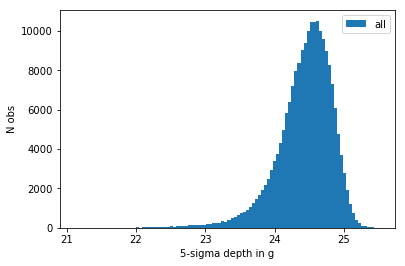

In [3]:
filternames = 'g' #'u,g,r,i,z,y'
for fn in filternames:
    in_filt = np.where(df['filter'].values == fn)
    plt.hist(df['fiveSigmaDepth'].values[in_filt], bins=100, label='all')
    plt.legend()
    plt.xlabel('5-sigma depth in %s' % fn)
    plt.ylabel('N obs')

In [4]:
np.unique(df['note'].values)

array(['DD:290', 'DD:COSMOS', 'DD:ECDFS', 'DD:ELAISS1', 'DD:XMM-LSS',
       'DD:u,290', 'DD:u,COSMOS', 'DD:u,ECDFS', 'DD:u,ELAISS1',
       'DD:u,XMM-LSS', 'blob, gr, a', 'blob, gr, b', 'blob, iz, a',
       'blob, iz, b', 'blob, ri, a', 'blob, ri, b', 'blob, ug, a',
       'blob, ug, b', 'blob, ur, a', 'blob, ur, b', 'blob, uu, a',
       'blob, uu, b', 'blob, yy, a', 'blob, yy, b', 'blob, zy, a',
       'blob, zy, b', 'greedy'], dtype=object)

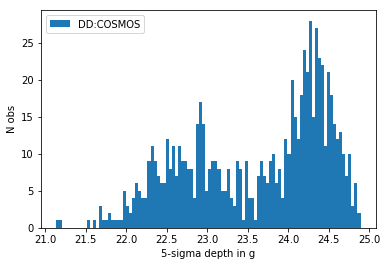

In [5]:
for fn in filternames:
    note = 'DD:COSMOS'
    in_filt = np.where((df['filter'].values== fn) & (df['note'].values == note))
    plt.hist(df['fiveSigmaDepth'].values[in_filt], bins=100, label=note)
    plt.legend()
    plt.xlabel('5-sigma depth in %s' % fn)
    plt.ylabel('N obs')


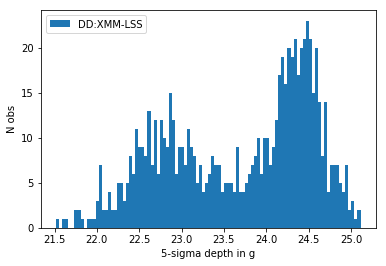

In [6]:
for fn in filternames:
    note = 'DD:XMM-LSS'
    in_filt = np.where((df['filter'].values== fn) & (df['note'].values == note))
    plt.hist(df['fiveSigmaDepth'].values[in_filt], bins=100, label=note)
    plt.legend()
    plt.xlabel('5-sigma depth in %s' % fn)
    plt.ylabel('N obs')


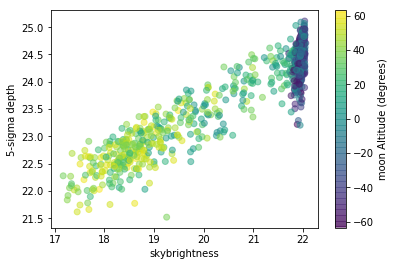

In [7]:
plt.scatter(df['skyBrightness'].values[in_filt], df['fiveSigmaDepth'].values[in_filt],c=df['moonAlt'].values[in_filt], alpha=0.5)
plt.ylabel('5-sigma depth')
plt.xlabel('skybrightness')
cb = plt.colorbar()
cb.set_label('moon Altitude (degrees)')